In [10]:
import pickle
import torch
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [106]:
with open('../data/tsp/val_cost.pkl', 'rb') as file:
    data = pickle.load(file)
cost = [torch.FloatTensor(x) for x in data]

with open('../data/tsp/val_location.pkl', 'rb') as file:
    data = pickle.load(file)
location = [torch.FloatTensor(x) for x in data]

In [114]:
cost = torch.stack(cost)

In [122]:
seq = []
for i in range(len(cost)):
    pi = np.arange(0, 100)
    rd.shuffle(pi)
    seq.append(pi)

pi_seq = [torch.tensor(i, dtype=torch.int64) for i in seq]
pi_seq = torch.stack(pi_seq, 0)


In [125]:
matrix_by_row = torch.gather(cost, 1, pi_seq.unsqueeze(-1).expand_as(cost))
reorder_cost_data = torch.gather(matrix_by_row, 2, pi_seq.unsqueeze(1).expand_as(cost))



In [126]:
reorder_cost_data[17][5:10][:,5:10]

tensor([[  0.0000,  43.1000,  59.7000,   0.0000,  31.3000],
        [ 81.3000,   0.0000,  16.6000,   0.0000,  69.6000],
        [ 64.7000,  64.8000,   0.0000,   0.0000,  53.0000],
        [674.7000, 693.5000, 695.5000,   0.0000, 681.7000],
        [ 93.1000,  11.8000,  28.4000,   0.0000,   0.0000]])

In [127]:
temp = cost[17]
selected = pi_seq[17][5:10]
temp[selected][:, selected]

tensor([[  0.0000,  43.1000,  59.7000,   0.0000,  31.3000],
        [ 81.3000,   0.0000,  16.6000,   0.0000,  69.6000],
        [ 64.7000,  64.8000,   0.0000,   0.0000,  53.0000],
        [674.7000, 693.5000, 695.5000,   0.0000, 681.7000],
        [ 93.1000,  11.8000,  28.4000,   0.0000,   0.0000]])

In [64]:
a = torch.tensor([])
b = torch.cat((a, torch.LongTensor([1,2,3,4])), dim=0)
torch.cat((b, torch.tensor([1,2,3,4,5,6])), dim=0)
b

tensor([1., 2., 3., 4.])

In [50]:
a = torch.tensor([])
b=torch.cat((a, torch.LongTensor([[1,2,3,4], [4,5,6,7]])), dim=0)#[1:]
b
torch.cat((b, torch.LongTensor([[1,2,3,4], [9,8,7,9]])), dim=0)

tensor([[1., 2., 3., 4.],
        [4., 5., 6., 7.],
        [1., 2., 3., 4.],
        [9., 8., 7., 9.]])

In [9]:
# Original 2D tensor
tensor_2d = torch.tensor([
    [1, 4, 6, 5, 0, 9, 7, 8],
    [3, 0, 2, 6, 1, 7, 5, 4],
    [8, 5, 0, 3, 2, 1, 4, 7]
])

# Function to shift each row from the value 0 onwards
def shift_row(row):
    zero_index = (row == 0).nonzero(as_tuple=True)[0].item()
    part1 = row[zero_index:]  # From value 0 to the end
    part2 = row[:zero_index]  # From the beginning to value 0
    return torch.cat((part1, part2))

# Apply the function to each row and stack the results
new_tensor_2d = torch.stack([shift_row(row) for row in tensor_2d])

print(new_tensor_2d)

tensor([[0, 9, 7, 8, 1, 4, 6, 5],
        [0, 2, 6, 1, 7, 5, 4, 3],
        [0, 3, 2, 1, 4, 7, 8, 5]])


In [ ]:
# function used for shifting the tour so that 0 is the starting point (depot)
def shift_row(row, by='min'):
    if by == 'min':
        zero_index = (row.min()).nonzero(as_tuple=True)[0].item()
    elif by == 'max':
        
        zero_index = (row.max()).nonzero(as_tuple=True)[0].item()
    else:
        zero_index = (row == 0).nonzero(as_tuple=True)[0].item()
    part1 = row[zero_index:]  # From value 0 to the end
    part2 = row[:zero_index]  # From the beginning to value 0
    return torch.cat((part1, part2))
        
# if self.problem == 'tsp':
#     ret_sequences = torch.stack([shift_row(row, by='min') for row in ret_sequences])
#     ret_outpus    = torch.stack([shift_row(row, by='max') for row in ret_outpus])

In [70]:
import random
a = [[1,2,3], [4,5,6], [7,8,9]]
b = [4,7,8]
temp = list(zip(location[:2], cost[:2]))
random.shuffle(temp)
res1, res2 = zip(*temp)
# res1 and res2 come out as tuples, and so must be converted to lists.
a, b = list(res1), list(res2)


In [3]:
with open('../outputs/tsp_100/tsp100_rollout_20240525_nocost/val_pi.pkl', 'rb') as f:
    data = pickle.load(f)

data

tensor([[ 0., 26., 83.,  ..., 33., 30., 31.],
        [ 0., 91., 98.,  ..., 15., 17., 16.],
        [ 0., 14., 13.,  ...,  2.,  3.,  4.],
        ...,
        [ 0., 51., 56.,  ..., 47., 48.,  4.],
        [ 0., 61., 60.,  ...,  9., 64., 63.],
        [ 0., 49., 47.,  ..., 48., 51.,  4.]])

In [39]:
a = torch.tensor([[1,1,2,3], [4,5,6,7],[8,9,8,10]])
b = torch.tensor([])
b = torch.cat((b, a[0]), 0)
b = torch.cat((b, a[1]), 0)
b

tensor([1., 1., 2., 3., 4., 5., 6., 7.])

In [10]:
import pickle
with open('../results/tsp/eval_location/eval_location-tsp_100_tsp100_rollout_20240524T022531-greedy-t1-0-5000.pkl', 'rb') as f:
    data = pickle.load(f)

data


([(1923.6998,
   [0,
    1,
    2,
    3,
    4,
    5,
    6,
    7,
    8,
    9,
    10,
    11,
    12,
    13,
    14,
    15,
    16,
    17,
    18,
    19,
    20,
    21,
    22,
    23,
    24,
    25,
    26,
    27,
    28,
    29,
    30,
    31,
    32,
    33,
    34,
    35,
    36,
    37,
    38,
    39,
    40,
    41,
    42,
    43,
    44,
    45,
    46,
    47,
    48,
    49,
    50,
    51,
    52,
    53,
    54,
    55,
    56,
    57,
    58,
    59,
    60,
    61,
    62,
    63,
    64,
    65,
    66,
    67,
    68,
    69,
    70,
    71,
    72,
    73,
    74,
    75,
    76,
    77,
    78,
    79,
    80,
    81,
    82,
    83,
    84,
    85,
    86,
    87,
    88,
    89,
    90,
    91,
    92,
    93,
    94,
    95,
    96,
    97,
    98,
    99],
   8.648553848266602),
  (2328.2998,
   [0,
    1,
    2,
    3,
    4,
    5,
    6,
    7,
    8,
    9,
    10,
    11,
    12,
    13,
    14,
    15,
    16,
    17,
    18,
    19,
    20,


In [15]:
def sequence_deviation(output_sequences):
    """
    output_sequences should be a list of list (2 dim)
    return: standard deviation of each sequence
    """
    a = [2*np.sum([np.abs(seq[i+1] - seq[i]) -1 for i in range(len(seq)-1)])/(len(seq) * (len(seq)-1)) for seq in output_sequences]
    return a

#sequences = torch.Tensor([[0,1,2,3,4], [4,3,2,1,0], [0,1,3,4,2], [4,2,1,3,0], [1,2,3,4,0]])
with open('../outputs/tsp_100/tsp100_rollout_20240525_cost_100epochs/val_pi.pkl', 'rb') as f:
    data = pickle.load(f)
    data = torch.tensor(data, dtype=torch.int64)
SD = sequence_deviation(data)
np.max(SD), np.min(SD), np.std(SD)

C:\Users\tratru\AppData\Local\Temp\ipykernel_20960\3785381596.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data = torch.tensor(data, dtype=torch.int64)


(0.777979797979798, 0.0, 0.13303395576890167)

In [20]:
np.mean(SD)

0.37159935353535356

(array([  7.,   9.,  19.,  15.,  12.,  13.,  13.,  16.,  25.,  63.,  77.,
        121., 131., 148., 179., 201., 177., 174., 180., 172., 197., 193.,
        186., 210., 177., 201., 204., 173., 164., 200., 185., 155., 162.,
        145., 156., 139., 107.,  87.,  77.,  56.,  20.,  18.,  13.,  11.,
          5.,   2.,   2.,   2.,   0.,   1.]),
 array([0.        , 0.0155596 , 0.03111919, 0.04667879, 0.06223838,
        0.07779798, 0.09335758, 0.10891717, 0.12447677, 0.14003636,
        0.15559596, 0.17115556, 0.18671515, 0.20227475, 0.21783434,
        0.23339394, 0.24895354, 0.26451313, 0.28007273, 0.29563232,
        0.31119192, 0.32675152, 0.34231111, 0.35787071, 0.3734303 ,
        0.3889899 , 0.40454949, 0.42010909, 0.43566869, 0.45122828,
        0.46678788, 0.48234747, 0.49790707, 0.51346667, 0.52902626,
        0.54458586, 0.56014545, 0.57570505, 0.59126465, 0.60682424,
        0.62238384, 0.63794343, 0.65350303, 0.66906263, 0.68462222,
        0.70018182, 0.71574141, 0.73130101, 0.

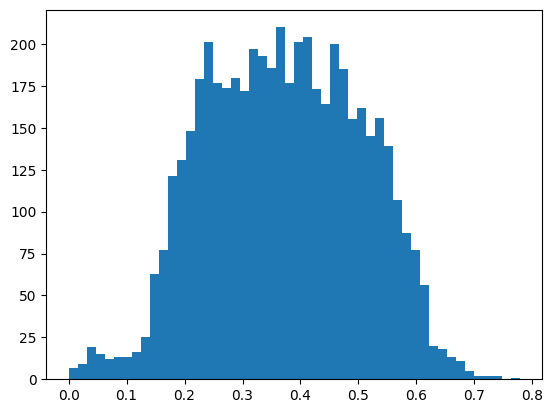

In [14]:
plt.hist(SD, bins=50)

In [9]:
data[81]

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
        28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41.,
        42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
        56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
        70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82., 83.,
        84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95., 96., 97.,
        98., 99.])

In [6]:
a = torch.tensor([], dtype=torch.int64)
b = torch.cat((a, torch.tensor([1,2,3])), 0)
b

tensor([1, 2, 3])

In [65]:
p = np.arange(1, 100)
rd.shuffle(p)
a = np.append(0, p)
a

array([ 0,  7, 80, 59, 51, 39, 85, 25, 55, 68, 48, 30,  1, 69, 98, 64, 58,
       18, 63, 47, 19, 76, 37, 90, 89, 22, 42, 61, 96, 49, 62, 14, 32, 60,
       74, 75, 84, 67, 34, 77, 50, 38, 70, 15, 88, 28, 94, 86, 71, 65, 52,
       23, 87, 46, 79, 40, 72,  5, 95,  4, 45,  2, 21, 91, 35, 81, 53, 93,
       41, 56,  9, 36, 44, 97, 26, 16, 24, 82, 12, 11, 27, 20, 33, 43, 17,
        8, 31, 54, 57, 78, 83, 73,  3, 99,  6, 29, 10, 13, 66, 92])

In [105]:
arr = []
for i in range(5):
    p = np.arange(1, 100)
    rd.shuffle(p)
    k = np.append(0, p)
    arr.append(k)
arr

[array([ 0, 85,  2, 51, 41, 64, 84, 19, 16, 48, 74, 88, 27, 55, 86, 49, 18,
        77, 98, 38, 57, 68,  3,  7, 82,  6, 80, 69, 53, 66, 79, 23, 90, 97,
        71, 89, 36,  4, 95, 70, 62, 24, 44, 46, 34,  8, 45, 91, 54, 78, 99,
        13, 22,  5, 92, 39, 31, 52, 83, 42, 25, 65, 32, 81, 28, 76, 21, 72,
        63, 33, 50, 43, 93, 67, 20, 56, 47, 15, 96, 58, 17, 35,  1, 87, 14,
        73, 61, 12, 75, 30, 60,  9, 59, 37, 26, 29, 94, 10, 40, 11]),
 array([ 0, 15, 27, 80,  5, 94, 62, 40, 31, 90, 42, 59, 82, 10, 43, 79, 54,
        35,  4, 28,  7, 56, 63, 23, 61, 51, 75, 95, 46, 77, 25, 67, 53, 33,
        13, 93, 49, 99, 47, 71, 21, 38, 76, 98,  8, 60, 52, 39, 78, 84, 83,
        74,  2, 41, 64, 36, 72, 29,  6, 97,  9, 96, 66, 89, 58, 55, 32, 30,
        17, 19, 57, 11, 45, 91, 87, 14, 12,  1,  3, 70, 16, 88, 50, 20, 73,
        44, 48, 68, 22, 18, 24, 69, 92, 65, 86, 81, 34, 85, 37, 26]),
 array([ 0, 11, 36, 68, 78,  2, 12, 49, 77, 65, 15, 45,  4,  9, 83, 28, 47,
        92, 23, 24, 75, 

In [21]:
origin = np.array([0,1,2,3,4,5,6,7,8,9])
sort1 =  np.array([1,4,6,7,9,0,3,2,8,5])
origin1 = origin[sort1]

sort2 = np.array([0,2,4,7,8,3,5,9,1,6])
origin2 = origin1[sort2]

origin1, origin2

(array([1, 4, 6, 7, 9, 0, 3, 2, 8, 5]), array([1, 6, 9, 2, 8, 7, 0, 5, 4, 3]))

In [27]:
driver = np.array([0,1,2,3,4,5])
sort1 = np.array([0,1,4,5,3,2])

input = driver[sort1]
pi = np.array([0,4,2,5,3,1])
sequence_deviation([input[pi]]) # seq compare to driver tour

[0.5333333333333333]

In [25]:
random = [[0,1,4,5,3,2],[0,1,2,3,4,5],[0,2,4,5,3,1]]
pi = [[0,4,2,5,3,1],[0,5,1,3,2,4],[0,4,1,5,3,2]]

random = torch.tensor(random)
pi = torch.tensor(pi, dtype=torch.int64)
torch.gather(random, 1, pi)

tensor([[0, 3, 4, 2, 5, 1],
        [0, 5, 1, 3, 2, 4],
        [0, 3, 2, 1, 5, 4]])